In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle



In [27]:
# Load datasets
fake_df = pd.read_csv("dataset/Fake.csv")
true_df = pd.read_csv("dataset/True.csv")

In [28]:
# Add labels: 0 for fake, 1 for true
fake_df['label'] = 0
true_df['label'] = 1


In [29]:
# Combine datasets
data = pd.concat([fake_df, true_df], ignore_index=True)
data = data[['text', 'label']]


In [30]:
# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [31]:
# Prepare inputs (text) and outputs (labels)
X = data['text']
y = data['label']


In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [38]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')


In [37]:
# Build the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),  # Embedding Layer
    LSTM(128, return_sequences=False),  # LSTM Layer with 128 units
    Dropout(0.4),  # Dropout Layer to prevent overfitting
    Dense(64, activation='relu'),  # Fully connected Dense Layer
    Dropout(0.3),  # Dropout Layer
    Dense(1, activation='sigmoid')  # Output Layer with sigmoid activation for binary classification
])


In [14]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [15]:
# Train the model
print("Training LSTM Model...")
lstm_history = lstm_model.fit(X_train_padded, y_train, 
                              epochs=15,  # Increased epochs to 15
                              batch_size=64, 
                              validation_data=(X_test_padded, y_test))


Training RNN Model...
Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.5073 - loss: 0.7007 - val_accuracy: 0.4756 - val_loss: 0.6979
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.4914 - loss: 0.7160 - val_accuracy: 0.4814 - val_loss: 0.6932
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.5147 - loss: 0.6922 - val_accuracy: 0.5245 - val_loss: 0.6902
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.5156 - loss: 0.6906 - val_accuracy: 0.5245 - val_loss: 0.6858
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.5232 - loss: 0.6900 - val_accuracy: 0.5245 - val_loss: 0.6921
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.5203 - loss: 0.6925 - val_accuracy: 0.5245 - val_loss: 0.6920
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.5242 - loss: 0.6924 - val_accuracy: 0.5245 - val_loss: 0.6920
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0

In [16]:
# Evaluate the model
y_pred_lstm = lstm_model.predict(X_test_padded).ravel()
y_pred_lstm_class = (y_pred_lstm > 0.5).astype(int)

281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [17]:
# Performance metrics
print("\nLSTM Model Performance:")
print(classification_report(y_test, y_pred_lstm_class))


RNN Model Performance:
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      4710
           1       0.00      0.00      0.00      4270

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.28      0.52      0.36      8980



C:\Users\patha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\patha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\patha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Plot ROC Curve and AUC
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

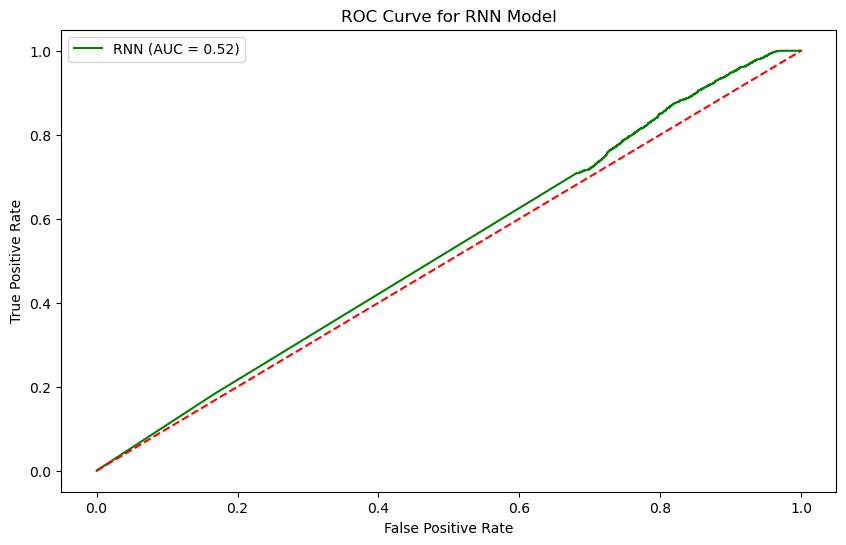

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model')
plt.legend()
plt.show()


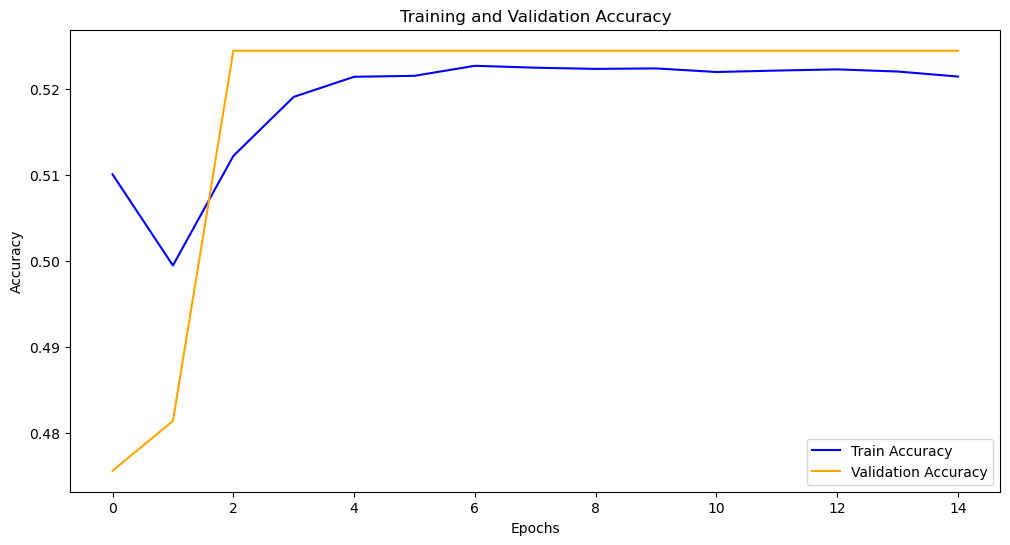

In [20]:
# Optional: Plot Training and Validation Accuracy/Loss over Epochs
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

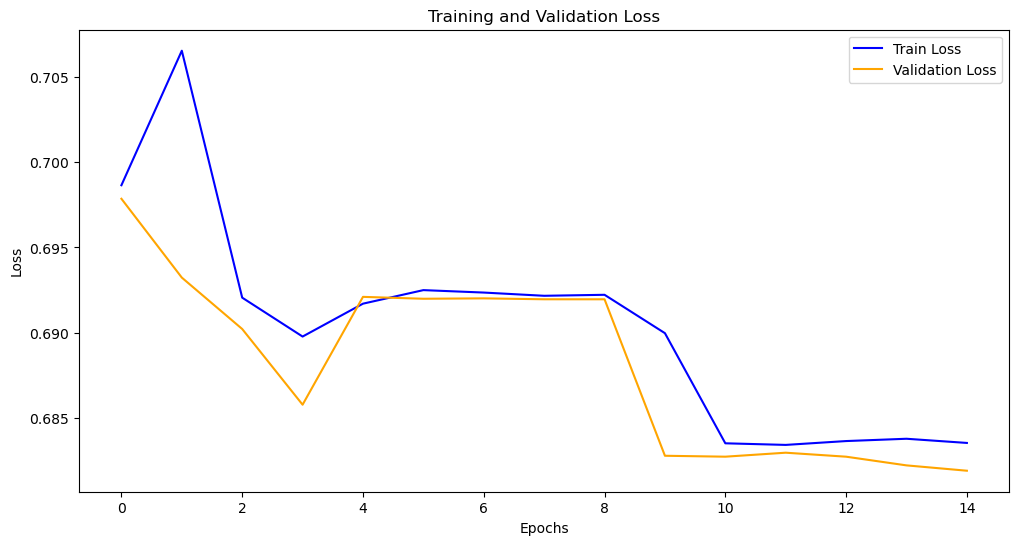

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Train Loss', color='blue')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Save model
lstm_model.save("lstm_model.keras")

In [52]:
# Save tokenizer for text preprocessing
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)